In [4]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np
import os

In [5]:
class GestureCNN(nn.Module):
    def __init__(self):
        super(GestureCNN, self).__init__()
        self.conv_layers = nn.Sequential(
            nn.Conv2d(3, 32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(32, 64, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )
        self.fc_layers = nn.Sequential(
            nn.Linear(128 * 37 * 37, 128),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(128, 3)  # 3 classes: Rock, Paper, Scissors
        )

    def forward(self, x):
         x = self.conv_layers(x)
         x = x.view(x.size(0), -1)  # Flatten the tensor
         x = self.fc_layers(x)
         return x


In [6]:
# Data transforms
transform = transforms.Compose([
    transforms.Resize((300, 300)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Load datasets
train_dataset = ImageFolder('C:/Users/alans/OneDrive/Documents/Python Scripts/Hand Gestures Recongition/Rock-Paper-Scissors/train', transform=transform)
test_dataset = ImageFolder('C:/Users/alans/OneDrive/Documents/Python Scripts/Hand Gestures Recongition/Rock-Paper-Scissors/test', transform=transform)

num_workers = 4
# Data loaders
batch_size = 32
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=num_workers)
test_loader = DataLoader(test_dataset, batch_size=batch_size, num_workers=num_workers)


In [7]:
model = GestureCNN()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [8]:
num_epochs = 10
for epoch in range(num_epochs):
    for images, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        print(f"Epoch [{epoch+1}/{num_epochs}], Batch Loss: {loss.item():.4f}")

   


Epoch [1/10], Batch Loss: 1.1025
Epoch [1/10], Batch Loss: 21.0480
Epoch [1/10], Batch Loss: 6.9879
Epoch [1/10], Batch Loss: 2.3013
Epoch [1/10], Batch Loss: 1.0820
Epoch [1/10], Batch Loss: 1.0950
Epoch [1/10], Batch Loss: 1.0610
Epoch [1/10], Batch Loss: 1.1350
Epoch [1/10], Batch Loss: 1.0864
Epoch [1/10], Batch Loss: 1.0261
Epoch [1/10], Batch Loss: 0.9924
Epoch [1/10], Batch Loss: 0.9543
Epoch [1/10], Batch Loss: 0.8399
Epoch [1/10], Batch Loss: 1.0180
Epoch [1/10], Batch Loss: 0.7426
Epoch [1/10], Batch Loss: 0.9346
Epoch [1/10], Batch Loss: 0.6947
Epoch [1/10], Batch Loss: 0.6971
Epoch [1/10], Batch Loss: 0.7531
Epoch [1/10], Batch Loss: 0.5421
Epoch [1/10], Batch Loss: 0.5188
Epoch [1/10], Batch Loss: 0.5584
Epoch [1/10], Batch Loss: 0.4293
Epoch [1/10], Batch Loss: 0.5783
Epoch [1/10], Batch Loss: 0.4373
Epoch [1/10], Batch Loss: 0.5657
Epoch [1/10], Batch Loss: 0.3173
Epoch [1/10], Batch Loss: 0.2313
Epoch [1/10], Batch Loss: 0.2411
Epoch [1/10], Batch Loss: 0.1540
Epoch [1/

In [9]:
# Test the model
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for images, labels in test_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f"Test Accuracy: {100 * correct / total:.2f}%")


Test Accuracy: 70.81%


In [10]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Set the model to evaluation mode
model.eval()

# Lists to store predicted and true labels
all_predicted_labels = []
all_true_labels = []

In [11]:
# Evaluate the model on the test dataset
with torch.no_grad():
    for images, labels in test_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        
        all_predicted_labels.extend(predicted.numpy())
        all_true_labels.extend(labels.numpy())

In [12]:
correct = sum(np.array(all_predicted_labels) == np.array(all_true_labels))
accuracy = correct / len(all_true_labels) * 100
print(f"Test Accuracy: {accuracy:.2f}%")

Test Accuracy: 70.81%


Classification Report:
              precision    recall  f1-score   support

        Rock       0.54      0.87      0.67        98
       Paper       0.89      0.73      0.80       124
    Scissors       0.79      0.56      0.66       124

    accuracy                           0.71       346
   macro avg       0.74      0.72      0.71       346
weighted avg       0.76      0.71      0.71       346



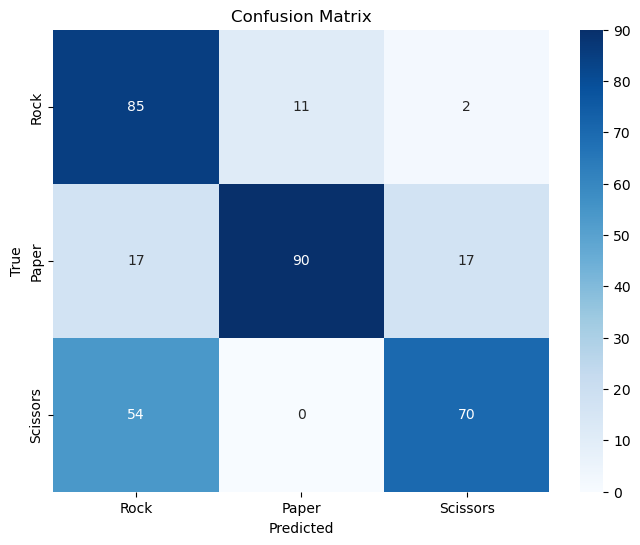

In [13]:
# Generate classification report
target_names = ['Rock', 'Paper', 'Scissors']
classification_rep = classification_report(all_true_labels, all_predicted_labels, target_names=target_names)
print("Classification Report:")
print(classification_rep)

# Generate confusion matrix
conf_matrix = confusion_matrix(all_true_labels, all_predicted_labels)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=target_names, yticklabels=target_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Predicted Label: Scissors


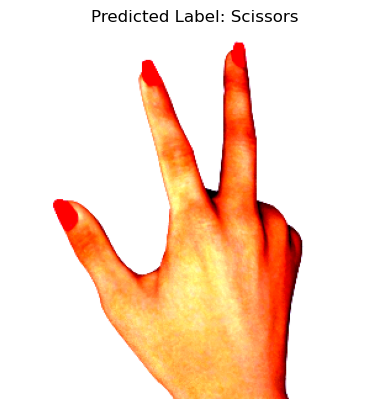

In [18]:
from PIL import Image

# Load and preprocess the image you want to predict
image_path = 'C:/Users/alans/OneDrive/Documents/Python Scripts/Hand Gestures Recongition/Rock-Paper-Scissors/test/scissors/testscissors01-05.png'
image = Image.open(image_path).convert('RGB')  # Ensure the image is in RGB format
image = transform(image)
image = image.unsqueeze(0)  # Add a batch dimension

# Get the model's prediction
with torch.no_grad():
    output = model(image)
    _, predicted_class = torch.max(output, 1)

class_names = ['Rock', 'Paper', 'Scissors']
predicted_label = class_names[predicted_class.item()]

print(f"Predicted Label: {predicted_label}")

plt.imshow(image.squeeze(0).permute(1, 2, 0).numpy())
plt.title(f"Predicted Label: {predicted_label}")
plt.axis('off')
plt.show()


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Predicted Label: Rock


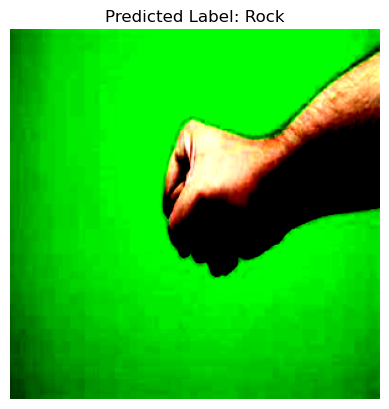

In [19]:
# Load and preprocess the image you want to predict
image_path = 'C:/Users/alans/OneDrive/Documents/Python Scripts/Hand Gestures Recongition/Raw data/OIP.jpg'
image = Image.open(image_path).convert('RGB')  # Ensure the image is in RGB format
image = transform(image)
image = image.unsqueeze(0)  # Add a batch dimension

# Get the model's prediction
with torch.no_grad():
    output = model(image)
    _, predicted_class = torch.max(output, 1)

class_names = ['Rock', 'Paper', 'Scissors']
predicted_label = class_names[predicted_class.item()]

print(f"Predicted Label: {predicted_label}")

plt.imshow(image.squeeze(0).permute(1, 2, 0).numpy())
plt.title(f"Predicted Label: {predicted_label}")
plt.axis('off')
plt.show()
